In [4]:
# Chonkie Chunking Strategies for StarTech Dataset
# Google Colab Notebook for experimenting with different text chunking approaches

"""
This notebook demonstrates three different chunking strategies using Chonkie:
1. Sentence-based chunking
2. Token-based chunking
3. Recursive/Semantic-based chunking

We'll apply these to the StarTech product dataset and compare the results.
"""

# ==========================================
# SECTION 1: INSTALLATION & IMPORTS
# ==========================================

# Install required packages
!pip install chonkie pandas matplotlib seaborn plotly

In [5]:


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import json
from typing import List, Dict, Any
import warnings
warnings.filterwarnings('ignore')

# Import Chonkie chunkers with error handling
try:
    from chonkie import SentenceChunker, TokenChunker, RecursiveChunker
    print("✅ All Chonkie chunkers imported successfully!")
except ImportError as e:
    print(f"⚠️  Import error: {e}")
    print("Installing specific Chonkie version...")
    !pip install --upgrade chonkie
    from chonkie import SentenceChunker, TokenChunker, RecursiveChunker

# Check available chunkers and their methods
print("📋 Available chunkers:")
for chunker_class in [SentenceChunker, TokenChunker, RecursiveChunker]:
    print(f"  - {chunker_class.__name__}")

# Let's inspect the RecursiveChunker signature
import inspect
try:
    signature = inspect.signature(RecursiveChunker.__init__)
    print(f"🔍 RecursiveChunker parameters: {list(signature.parameters.keys())}")
except Exception as e:
    print(f"⚠️  Could not inspect RecursiveChunker: {e}")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✅ All packages installed and imported successfully!")


✅ All Chonkie chunkers imported successfully!
📋 Available chunkers:
  - SentenceChunker
  - TokenChunker
  - RecursiveChunker
🔍 RecursiveChunker parameters: ['self', 'tokenizer_or_token_counter', 'chunk_size', 'rules', 'min_characters_per_chunk']
✅ All packages installed and imported successfully!


Please upload your StarTech CSV file:


Saving startech_fast_20250903_195133.csv to startech_fast_20250903_195133 (3).csv
📁 Loaded file: startech_fast_20250903_195133 (3).csv
📊 Dataset shape: (8462, 10)
🏷️  Columns: ['name', 'price', 'brand', 'category', 'subcategory', 'availability', 'image_url', 'product_url', 'model', 'rating']

📋 First few rows:


,name,price,brand,category,subcategory,availability,image_url,product_url,model,rating
0,Intel Core i3-12100 12th Gen Budget Desktop PC,"28,300৳30,120৳",NaN,Intel PC,Star PC,NaN,https://www.startech.com.bd/image/cache/catalog/desktop-pc/desktop-offer/intel-core-i3-12100-12t...,https://www.startech.com.bd/intel-core-i3-12100-12th-gen-budget-desktop-pc,NaN,NaN
1,Intel 10th Gen Core i5-10400 Desktop PC,"32,150৳",NaN,Intel PC,Star PC,NaN,https://www.startech.com.bd/image/cache/catalog/desktop-pc/desktop-offer/intel-10th-gen-core-i5-...,https://www.startech.com.bd/intel-10th-gen-core-i5-10400-desktop-pc,NaN,NaN
2,Intel 12th Gen Core i5-12400 Desktop PC,"33,248৳35,750৳",NaN,Intel PC,Star PC,NaN,https://www.startech.com.bd/image/cache/catalog/desktop-pc/desktop-offer/38909-228x228.webp,https://www.startech.com.bd/intel-12th-gen-core-i5-12400-desktop-pc,NaN,NaN
3,Intel Core i5 14500 14th Gen Desktop PC,"48,500৳51,800৳",NaN,Intel PC,Star PC,NaN,https://www.startech.com.bd/image/cache/catalog/desktop-pc/desktop-offer/intel-core-i5-14500-des...,https://www.startech.com.bd/intel-core-i5-14500-desktop-pc,NaN,NaN
4,Intel 13th Gen Core i5 13400 Budget Desktop PC with Monitor,"58,999৳60,600৳",NaN,Intel PC,Star PC,NaN,https://www.startech.com.bd/image/cache/catalog/desktop-pc/desktop-offer/intel-13th-gen-core-i5-...,https://www.startech.com.bd/intel-13th-gen-core-i5-13400-budget-desktop-pc-with-monitor,NaN,NaN



🔍 Data Quality Summary:
Total rows: 8462
Missing values per column:
  - brand: 8462 (100.0%)
  - subcategory: 508 (6.0%)
  - availability: 8462 (100.0%)
  - model: 8462 (100.0%)
  - rating: 8462 (100.0%)
📝 Created text corpus with 1049535 characters
📄 Sample text (first 500 chars):
Product: Intel Core i3-12100 12th Gen Budget Desktop PC. Category: Intel PC. Subcategory: Star PC. Price: 28,300৳30,120৳.

Product: Intel 10th Gen Core i5-10400 Desktop PC. Category: Intel PC. Subcategory: Star PC. Price: 32,150৳.

Product: Intel 12th Gen Core i5-12400 Desktop PC. Category: Intel PC. Subcategory: Star PC. Price: 33,248৳35,750৳.

Product: Intel Core i5 14500 14th Gen Desktop PC. Category: Intel PC. Subcategory: Star PC. Price: 48,500৳51,800৳.

Product: Intel 13th Gen Core i5 1340...

🔤 CHUNKING STRATEGY 1: SENTENCE-BASED
📊 Sentence-based Chunking Results:
  - Total chunks: 7637
  - Avg chunk length: 173.2 chars
  - Min chunk length: 75 chars
  - Max chunk length: 199 chars

📋 Sample sentence

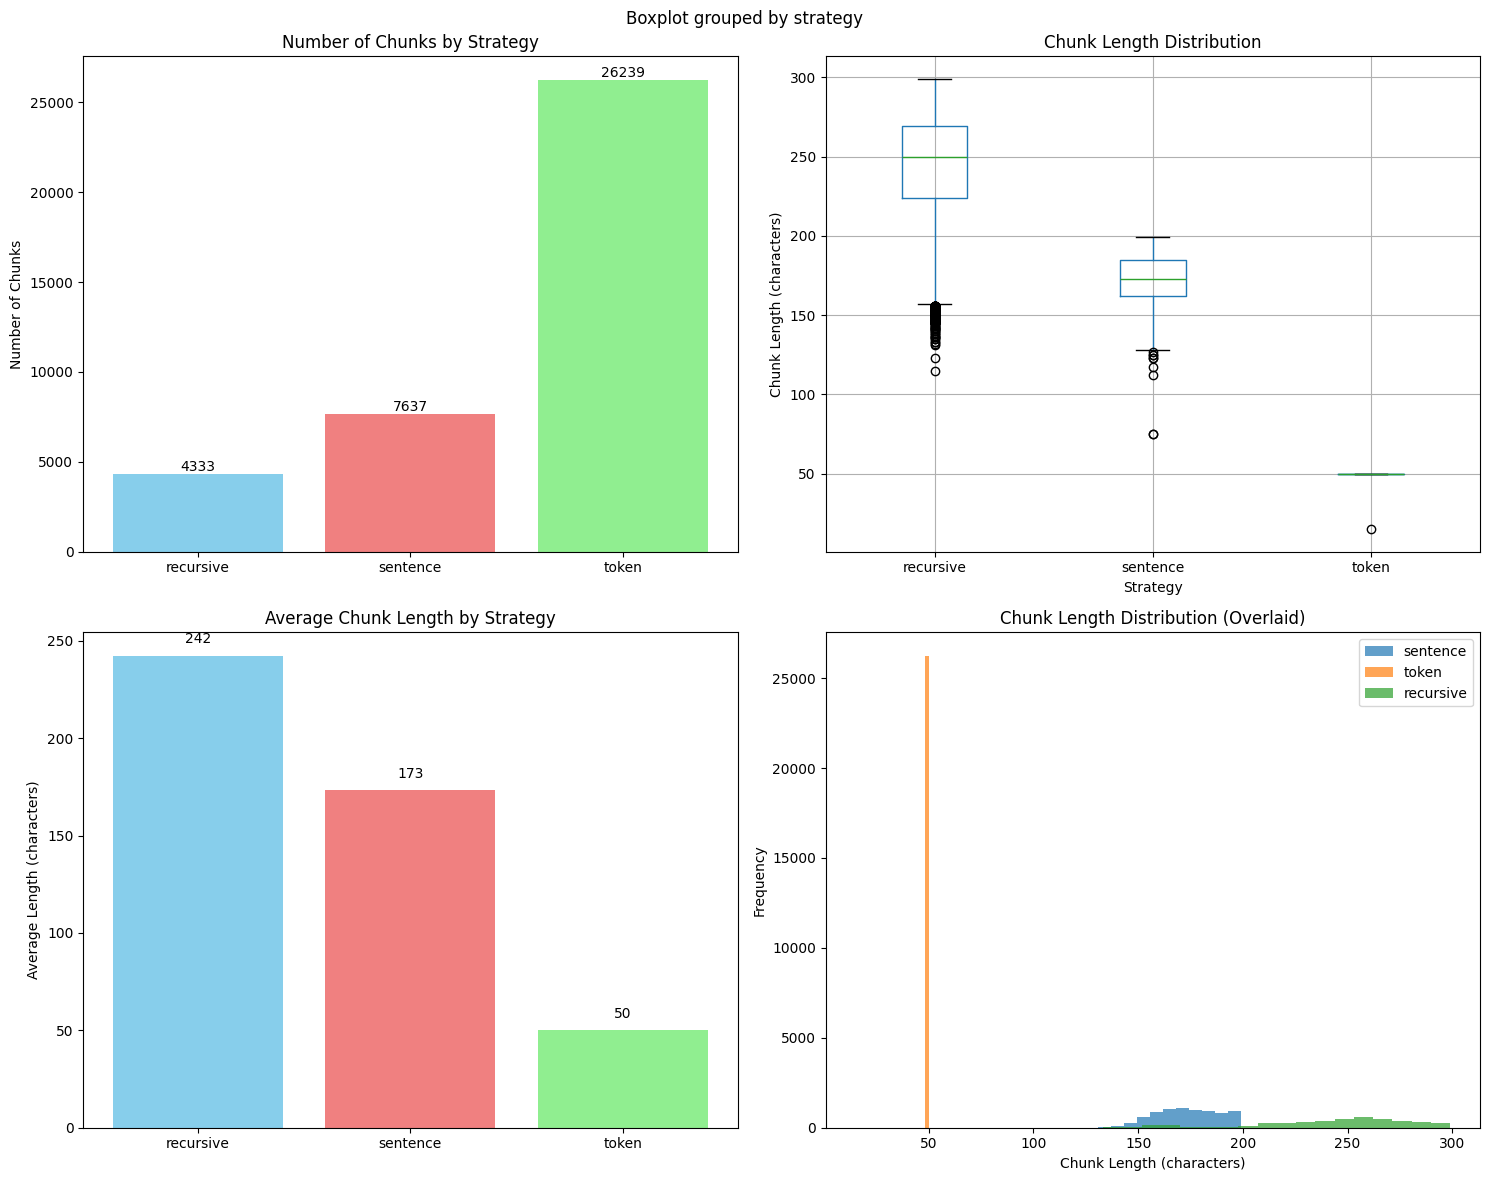


💾 SAVING RESULTS
✅ Results saved successfully!
📁 Files created:
  - startech_sentence_chunks.csv
  - startech_token_chunks.csv
  - startech_recursive_chunks.csv
  - startech_all_chunks_combined.csv
  - chunking_summary_statistics.csv

🔍 INTERACTIVE EXPLORATION



💡 RECOMMENDATIONS & NEXT STEPS
🎯 Based on the chunking analysis, here are the key insights:

📊 Chunking Efficiency (chunks per 1000 characters):
  - Sentence-based: 7.28
  - Token-based: 25.00
  - Recursive/Semantic: 4.13

🎯 Use Case Recommendations:
  🔤 Sentence-based: Best for maintaining grammatical integrity
  🎯 Token-based: Best for consistent processing load and embeddings
  🧠 Recursive/Semantic: Best for preserving context and meaning

🚀 Next Steps:
  1. Test these chunks with your specific use case (embeddings, LLM processing, etc.)
  2. Experiment with different chunk sizes based on your requirements
  3. Consider hybrid approaches combining multiple strategies
  4. Evaluate chunk quality using semantic similarity metrics
  5. A/B test different chunking strategies in your production pipeline

✨ Chunking experiment completed successfully! ✨


In [8]:
# ==========================================
# SECTION 2: DATA LOADING & PREPROCESSING
# ==========================================

# Upload your CSV file (replace with your file path)
# For Colab: upload the file using the file upload widget
from google.colab import files

print("Please upload your StarTech CSV file:")
uploaded = files.upload()

# Get the filename (assuming it's the first uploaded file)
filename = list(uploaded.keys())[0]
print(f"📁 Loaded file: {filename}")

# Load the dataset
df = pd.read_csv(filename)

print(f"📊 Dataset shape: {df.shape}")
print(f"🏷️  Columns: {list(df.columns)}")
print("\n📋 First few rows:")
display(df.head())

# Data quality check
print("\n🔍 Data Quality Summary:")
print(f"Total rows: {len(df)}")
print(f"Missing values per column:")
for col in df.columns:
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f"  - {col}: {missing} ({missing/len(df)*100:.1f}%)")

# ==========================================
# SECTION 3: TEXT PREPARATION
# ==========================================

def create_product_text(row):
    """
    Combine multiple columns into a comprehensive text representation
    of each product for chunking experiments.
    """
    text_parts = []

    # Add name
    if pd.notna(row['name']):
        text_parts.append(f"Product: {row['name']}")

    # Add brand and model
    if pd.notna(row['brand']):
        text_parts.append(f"Brand: {row['brand']}")
    if pd.notna(row['model']):
        text_parts.append(f"Model: {row['model']}")

    # Add category information
    if pd.notna(row['category']):
        text_parts.append(f"Category: {row['category']}")
    if pd.notna(row['subcategory']):
        text_parts.append(f"Subcategory: {row['subcategory']}")

    # Add price and availability
    if pd.notna(row['price']):
        text_parts.append(f"Price: {row['price']}")
    if pd.notna(row['availability']):
        text_parts.append(f"Availability: {row['availability']}")

    # Add rating if available
    if pd.notna(row['rating']):
        text_parts.append(f"Rating: {row['rating']}")

    return ". ".join(text_parts) + "."

# Create comprehensive text for each product
df['full_text'] = df.apply(create_product_text, axis=1)

# Create a combined corpus for chunking
corpus_text = "\n\n".join(df['full_text'].tolist())

print(f"📝 Created text corpus with {len(corpus_text)} characters")
print(f"📄 Sample text (first 500 chars):")
print(corpus_text[:500] + "...")

# ==========================================
# SECTION 4: CHUNKING STRATEGY 1 - SENTENCE-BASED
# ==========================================

print("\n" + "="*60)
print("🔤 CHUNKING STRATEGY 1: SENTENCE-BASED")
print("="*60)

# Initialize sentence chunker
sentence_chunker = SentenceChunker(
    chunk_size=200,        # Target chunk size in characters
    chunk_overlap=50       # Overlap between chunks
)

# Apply sentence-based chunking
sentence_chunks = sentence_chunker.chunk(corpus_text)

print(f"📊 Sentence-based Chunking Results:")
print(f"  - Total chunks: {len(sentence_chunks)}")
print(f"  - Avg chunk length: {np.mean([len(chunk.text) for chunk in sentence_chunks]):.1f} chars")
print(f"  - Min chunk length: {min([len(chunk.text) for chunk in sentence_chunks])} chars")
print(f"  - Max chunk length: {max([len(chunk.text) for chunk in sentence_chunks])} chars")

# Sample chunks
print(f"\n📋 Sample sentence-based chunks:")
for i, chunk in enumerate(sentence_chunks[:3]):
    print(f"\nChunk {i+1} ({len(chunk.text)} chars):")
    print(f"  {chunk.text[:100]}...")

# Store sentence chunks data
sentence_chunks_data = []
for i, chunk in enumerate(sentence_chunks):
    sentence_chunks_data.append({
        'chunk_id': i,
        'strategy': 'sentence',
        'text': chunk.text,
        'length': len(chunk.text),
        'start_index': chunk.start_index,
        'end_index': chunk.end_index
    })

sentence_df = pd.DataFrame(sentence_chunks_data)

# ==========================================
# SECTION 5: CHUNKING STRATEGY 2 - TOKEN-BASED
# ==========================================

print("\n" + "="*60)
print("🎯 CHUNKING STRATEGY 2: TOKEN-BASED")
print("="*60)

# Initialize token chunker
token_chunker = TokenChunker(
    chunk_size=50,         # Target chunk size in tokens
    chunk_overlap=10       # Overlap in tokens
)

# Apply token-based chunking
token_chunks = token_chunker.chunk(corpus_text)

print(f"📊 Token-based Chunking Results:")
print(f"  - Total chunks: {len(token_chunks)}")
print(f"  - Avg chunk length: {np.mean([len(chunk.text) for chunk in token_chunks]):.1f} chars")
print(f"  - Min chunk length: {min([len(chunk.text) for chunk in token_chunks])} chars")
print(f"  - Max chunk length: {max([len(chunk.text) for chunk in token_chunks])} chars")

# Sample chunks
print(f"\n📋 Sample token-based chunks:")
for i, chunk in enumerate(token_chunks[:3]):
    print(f"\nChunk {i+1} ({len(chunk.text)} chars):")
    print(f"  {chunk.text[:100]}...")

# Store token chunks data
token_chunks_data = []
for i, chunk in enumerate(token_chunks):
    token_chunks_data.append({
        'chunk_id': i,
        'strategy': 'token',
        'text': chunk.text,
        'length': len(chunk.text),
        'start_index': chunk.start_index,
        'end_index': chunk.end_index
    })

token_df = pd.DataFrame(token_chunks_data)

# ==========================================
# SECTION 6: CHUNKING STRATEGY 3 - RECURSIVE/SEMANTIC
# ==========================================

print("\n" + "="*60)
print("🧠 CHUNKING STRATEGY 3: RECURSIVE/SEMANTIC-BASED")
print("="*60)

# Initialize recursive chunker
recursive_chunker = RecursiveChunker(
    chunk_size=300,        # Target chunk size
    # separators=['\n\n', '\n', '. ', ', ', ' ']  # Hierarchical separators
)

# Apply recursive/semantic chunking
recursive_chunks = recursive_chunker.chunk(corpus_text)

print(f"📊 Recursive/Semantic Chunking Results:")
print(f"  - Total chunks: {len(recursive_chunks)}")
print(f"  - Avg chunk length: {np.mean([len(chunk.text) for chunk in recursive_chunks]):.1f} chars")
print(f"  - Min chunk length: {min([len(chunk.text) for chunk in recursive_chunks])} chars")
print(f"  - Max chunk length: {max([len(chunk.text) for chunk in recursive_chunks])} chars")

# Sample chunks
print(f"\n📋 Sample recursive/semantic chunks:")
for i, chunk in enumerate(recursive_chunks[:3]):
    print(f"\nChunk {i+1} ({len(chunk.text)} chars):")
    print(f"  {chunk.text[:100]}...")

# Store recursive chunks data
recursive_chunks_data = []
for i, chunk in enumerate(recursive_chunks):
    recursive_chunks_data.append({
        'chunk_id': i,
        'strategy': 'recursive',
        'text': chunk.text,
        'length': len(chunk.text),
        'start_index': chunk.start_index,
        'end_index': chunk.end_index
    })

recursive_df = pd.DataFrame(recursive_chunks_data)

# ==========================================
# SECTION 7: COMPARISON & ANALYSIS
# ==========================================

print("\n" + "="*60)
print("📈 CHUNKING STRATEGIES COMPARISON")
print("="*60)

# Combine all chunking results for comparison
all_chunks = pd.concat([sentence_df, token_df, recursive_df], ignore_index=True)

# Summary statistics
summary_stats = all_chunks.groupby('strategy').agg({
    'length': ['count', 'mean', 'std', 'min', 'max'],
    'chunk_id': 'count'
}).round(2)

print("📊 Summary Statistics:")
print(summary_stats)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Chunking Strategies Comparison', fontsize=16, fontweight='bold')

# 1. Chunk count comparison
chunk_counts = all_chunks.groupby('strategy').size()
axes[0, 0].bar(chunk_counts.index, chunk_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0, 0].set_title('Number of Chunks by Strategy')
axes[0, 0].set_ylabel('Number of Chunks')
for i, v in enumerate(chunk_counts.values):
    axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')

# 2. Length distribution
all_chunks.boxplot(column='length', by='strategy', ax=axes[0, 1])
axes[0, 1].set_title('Chunk Length Distribution')
axes[0, 1].set_xlabel('Strategy')
axes[0, 1].set_ylabel('Chunk Length (characters)')

# 3. Average chunk length
avg_lengths = all_chunks.groupby('strategy')['length'].mean()
axes[1, 0].bar(avg_lengths.index, avg_lengths.values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1, 0].set_title('Average Chunk Length by Strategy')
axes[1, 0].set_ylabel('Average Length (characters)')
for i, v in enumerate(avg_lengths.values):
    axes[1, 0].text(i, v + 5, f'{v:.0f}', ha='center', va='bottom')

# 4. Length histogram
for strategy in ['sentence', 'token', 'recursive']:
    strategy_data = all_chunks[all_chunks['strategy'] == strategy]['length']
    axes[1, 1].hist(strategy_data, alpha=0.7, label=strategy, bins=20)
axes[1, 1].set_title('Chunk Length Distribution (Overlaid)')
axes[1, 1].set_xlabel('Chunk Length (characters)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ==========================================
# SECTION 8: SAVE RESULTS
# ==========================================

print("\n" + "="*60)
print("💾 SAVING RESULTS")
print("="*60)

# Save individual chunking results
sentence_df.to_csv('startech_sentence_chunks.csv', index=False)
token_df.to_csv('startech_token_chunks.csv', index=False)
recursive_df.to_csv('startech_recursive_chunks.csv', index=False)

# Save combined results
all_chunks.to_csv('startech_all_chunks_combined.csv', index=False)

# Save summary statistics
summary_stats.to_csv('chunking_summary_statistics.csv')

print("✅ Results saved successfully!")
print("📁 Files created:")
print("  - startech_sentence_chunks.csv")
print("  - startech_token_chunks.csv")
print("  - startech_recursive_chunks.csv")
print("  - startech_all_chunks_combined.csv")
print("  - chunking_summary_statistics.csv")

# ==========================================
# SECTION 9: INTERACTIVE EXPLORATION
# ==========================================

print("\n" + "="*60)
print("🔍 INTERACTIVE EXPLORATION")
print("="*60)

# Create an interactive comparison using Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Chunk Count by Strategy', 'Chunk Length Distribution',
                   'Average Chunk Length', 'Length Distribution (Box Plot)'),
    specs=[[{"type": "bar"}, {"type": "histogram"}],
           [{"type": "bar"}, {"type": "box"}]]
)

# Chunk count
chunk_counts = all_chunks.groupby('strategy').size()
fig.add_trace(
    go.Bar(x=chunk_counts.index, y=chunk_counts.values, name="Chunk Count",
           marker_color=['skyblue', 'lightcoral', 'lightgreen']),
    row=1, col=1
)

# Length histogram
colors = {'sentence': 'skyblue', 'token': 'lightcoral', 'recursive': 'lightgreen'}
for strategy in ['sentence', 'token', 'recursive']:
    strategy_data = all_chunks[all_chunks['strategy'] == strategy]['length']
    fig.add_trace(
        go.Histogram(x=strategy_data, name=f"{strategy} chunks",
                    marker_color=colors[strategy], opacity=0.7),
        row=1, col=2
    )

# Average length
avg_lengths = all_chunks.groupby('strategy')['length'].mean()
fig.add_trace(
    go.Bar(x=avg_lengths.index, y=avg_lengths.values, name="Avg Length",
           marker_color=['skyblue', 'lightcoral', 'lightgreen']),
    row=2, col=1
)

# Box plot
for strategy in ['sentence', 'token', 'recursive']:
    strategy_data = all_chunks[all_chunks['strategy'] == strategy]['length']
    fig.add_trace(
        go.Box(y=strategy_data, name=strategy, marker_color=colors[strategy]),
        row=2, col=2
    )

fig.update_layout(height=800, title_text="Interactive Chunking Strategies Comparison")
fig.show()

# ==========================================
# SECTION 10: RECOMMENDATIONS & NEXT STEPS
# ==========================================

print("\n" + "="*60)
print("💡 RECOMMENDATIONS & NEXT STEPS")
print("="*60)

print("🎯 Based on the chunking analysis, here are the key insights:")
print()

# Calculate efficiency metrics
sentence_efficiency = len(sentence_chunks) / len(corpus_text) * 1000
token_efficiency = len(token_chunks) / len(corpus_text) * 1000
recursive_efficiency = len(recursive_chunks) / len(corpus_text) * 1000

print(f"📊 Chunking Efficiency (chunks per 1000 characters):")
print(f"  - Sentence-based: {sentence_efficiency:.2f}")
print(f"  - Token-based: {token_efficiency:.2f}")
print(f"  - Recursive/Semantic: {recursive_efficiency:.2f}")

print()
print("🎯 Use Case Recommendations:")
print("  🔤 Sentence-based: Best for maintaining grammatical integrity")
print("  🎯 Token-based: Best for consistent processing load and embeddings")
print("  🧠 Recursive/Semantic: Best for preserving context and meaning")

print()
print("🚀 Next Steps:")
print("  1. Test these chunks with your specific use case (embeddings, LLM processing, etc.)")
print("  2. Experiment with different chunk sizes based on your requirements")
print("  3. Consider hybrid approaches combining multiple strategies")
print("  4. Evaluate chunk quality using semantic similarity metrics")
print("  5. A/B test different chunking strategies in your production pipeline")

print("\n✨ Chunking experiment completed successfully! ✨")